In [1]:
import pandas as pd
import sklearn 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df_votants = pd.read_csv('database_deputes.csv', index_col=0)
df_votes = pd.read_csv('database_votes2.csv', index_col=0)

Modification colonne demandeur de df_votes :

In [98]:
groupes = ["La République en Marche", "Socialistes et apparentés", "La France insoumise", 
           "Écologie Démocratie Solidarité", "UDI, Agir et Indépendants", "Nouvelle Gauche", 
           "Gauche démocrate et républicaine", "Mouvement Démocrate et apparentés", "Libertés et Territoires",
          "Les Républicains", "Agir Ensemble", "Commission", "Conférence des Présidents", "Gouvernement"]

In [36]:
def one_hot_demandeur (df_src, groupes):
    df = df_src.copy()
    df['demandeurs'] = 0
    
    # Crée de nouvelles colonnes qui serviront pour le 1 hot encoding des demandeurs
    for groupe in groupes:
        df[groupe] = 0 # Initilise à 0 pour tous les demandeurs
    df['Indéfini'] = 0
        
    # On parcourt ensuite les lignes du dataframe scrutin et on vérifie la présence de chaque demandeur 
    # dans la colonne demandeur
    
    for index, demandeur in enumerate(df.demandeur):
    
        indefini = True
        if type(demandeur) == str :
            for groupe in groupes :
                if groupe in demandeur :
                    indefini = False
                    df.loc[index, groupe] = 1
                    df.loc[index, 'demandeurs'] = groupe
        elif indefini :
            df.loc[index, 'Indéfini'] = 1
    
    return df

In [ ]:
df_votes_One_Hot = one_hot_demandeur(df_votes, groupes)
df_votes_One_Hot

# Création de la base à clusteriser

**Feature 1 : indice_accord**

In [94]:
indice_accord = pd.read_csv('indice_accord.csv', index_col=0)
indice_accord = indice_accord[['idVotant', 'IndiceAccord']]
indice_accord = indice_accord.rename(columns={'IndiceAccord' : 'indice_accord'})
indice_accord

,idVotant,indice_accord
0,PA719952,74.000000
1,PA607395,71.171171
2,PA718710,76.120959
3,PA718802,74.705882
4,PA719032,74.860957
...,...,...
570,PA720802,36.000000
571,PA643004,27.272727
572,PA719002,14.285714
573,PA774958,14.583333


On crée un indice pour la région mais on ne l'utilise pas pour l'instant

In [95]:
df_clustering = df_votants[['idVotant', 'Région']]
df_cluster = df_clustering.merge(indice_accord, on='idVotant', how='left')
df_cluster = df_cluster.groupby(['idVotant', 'Région', 'indice_accord']).count().reset_index()
df_cluster

,idVotant,Région,indice_accord
0,PA1008,Nouvelle-Aquitaine,31.937984
1,PA1012,Auvergne-Rhône-Alpes,37.425150
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364
3,PA1198,Normandie,32.047478
4,PA1206,Ile-de-France,28.409091
...,...,...,...
570,PA774962,Réunion,40.000000
571,PA856,Grand Est,38.770053
572,PA923,Grand Est,40.259740
573,PA942,Grand Est,51.327434


**Feature 2 : proportion_vote**

In [96]:
proportion_vote = pd.read_csv('proportion_vote.csv', index_col=0)
proportion_vote

,idVotant,Contre,Pour
0,PA1008,31.162791,68.837209
1,PA1012,34.131737,65.868263
2,PA1029,51.818182,48.181818
3,PA1198,33.234421,66.765579
4,PA1206,45.454545,54.545455
...,...,...,...
570,PA774962,80.000000,20.000000
571,PA856,42.780749,57.219251
572,PA923,41.991342,58.008658
573,PA942,49.778761,50.221239


In [97]:
df_cluster = df_cluster.merge(proportion_vote, on='idVotant', how='left')
df_cluster

,idVotant,Région,indice_accord,Contre,Pour
0,PA1008,Nouvelle-Aquitaine,31.937984,31.162791,68.837209
1,PA1012,Auvergne-Rhône-Alpes,37.425150,34.131737,65.868263
2,PA1029,Provence-Alpes-Côte d'Azur,43.636364,51.818182,48.181818
3,PA1198,Normandie,32.047478,33.234421,66.765579
4,PA1206,Ile-de-France,28.409091,45.454545,54.545455
...,...,...,...,...,...
570,PA774962,Réunion,40.000000,80.000000,20.000000
571,PA856,Grand Est,38.770053,42.780749,57.219251
572,PA923,Grand Est,40.259740,41.991342,58.008658
573,PA942,Grand Est,51.327434,49.778761,50.221239


In [54]:
#region = pd.read_excel('region.xls')
#region

In [55]:
#region = region[['Population par région', 'Unnamed: 5']]
#region = region.rename(columns={'Unnamed: 5' : 'densite_population_region', 'Population par région' : 'Région'})
#region = region.iloc[3:22]
#region

In [56]:
#df_cluster = df_cluster.merge(region, on='Région', how='left')
#df_cluster

In [98]:
#on enlève la région pour l'instant
df_cluster = df_cluster.drop(columns='Région')

In [99]:
df_cluster

,idVotant,indice_accord,Contre,Pour
0,PA1008,31.937984,31.162791,68.837209
1,PA1012,37.425150,34.131737,65.868263
2,PA1029,43.636364,51.818182,48.181818
3,PA1198,32.047478,33.234421,66.765579
4,PA1206,28.409091,45.454545,54.545455
...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000
571,PA856,38.770053,42.780749,57.219251
572,PA923,40.259740,41.991342,58.008658
573,PA942,51.327434,49.778761,50.221239


**Feature 3 : taux_participation**

In [100]:
oui = df_votes.groupby('idVotant').count()
oui['taux_participation'] = oui['idScrutin']/3117*100
oui = oui[['taux_participation']]
oui

,taux_participation
idVotant,
PA1008,20.692974
PA1012,10.715432
PA1029,3.529034
PA1198,10.811678
PA1206,5.646455
...,...
PA774962,0.160411
PA856,11.998717
PA923,7.410972


In [101]:
df_cluster = df_cluster.merge(oui, on='idVotant', how='left')
df_cluster

,idVotant,indice_accord,Contre,Pour,taux_participation
0,PA1008,31.937984,31.162791,68.837209,20.692974
1,PA1012,37.425150,34.131737,65.868263,10.715432
2,PA1029,43.636364,51.818182,48.181818,3.529034
3,PA1198,32.047478,33.234421,66.765579,10.811678
4,PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...,...
570,PA774962,40.000000,80.000000,20.000000,0.160411
571,PA856,38.770053,42.780749,57.219251,11.998717
572,PA923,40.259740,41.991342,58.008658,7.410972
573,PA942,51.327434,49.778761,50.221239,14.501123


In [102]:
df_cluster = df_cluster.set_index('idVotant')
df_cluster

,indice_accord,Contre,Pour,taux_participation
idVotant,,,,
PA1008,31.937984,31.162791,68.837209,20.692974
PA1012,37.425150,34.131737,65.868263,10.715432
PA1029,43.636364,51.818182,48.181818,3.529034
PA1198,32.047478,33.234421,66.765579,10.811678
PA1206,28.409091,45.454545,54.545455,5.646455
...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411
PA856,38.770053,42.780749,57.219251,11.998717
PA923,40.259740,41.991342,58.008658,7.410972


**Features ++ : historiques des votes**

In [103]:
copy = df_votes.copy()
copy = copy.pivot(index = 'idVotant', columns = 'idScrutin', values = 'vote')
copy

idScrutin,0,1,2,3,4,5,6,7,8,9,...,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,Pour
PA1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN
PA1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,NaN,...,NaN,NaN,NaN,NaN,NaN,Pour,NaN,NaN,NaN,NaN
PA1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#on remplace les NaN par de l'abstention (en confondant abstention et non-votant)
copy = copy.fillna('Non-votant')

In [105]:
resultats = pd.get_dummies(copy, drop_first=True)
resultats

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3112_Non-votant,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
PA1012,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
PA1029,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA1198,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
PA1206,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA856,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA923,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [106]:
df_cluster = df_cluster.merge(resultats, left_index=True, right_index=True)
df_cluster

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,...,3112_Non-votant,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
PA1012,37.425150,34.131737,65.868263,10.715432,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
PA1029,43.636364,51.818182,48.181818,3.529034,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA1198,32.047478,33.234421,66.765579,10.811678,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
PA1206,28.409091,45.454545,54.545455,5.646455,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA856,38.770053,42.780749,57.219251,11.998717,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA923,40.259740,41.991342,58.008658,7.410972,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


Les features 1 à 3 sont issues des statistiques descriptives sur la participation de chaque votant, son accord moyen par rapport au résultat final du scrutin et son pourcentage de vote pour et de vote contre. Ces statistiques sont intéressantes commes features car elles permettent de récupérer l'information perdue quand on crée la base pour le clustering. En effet, on perd le résultat final du scrutin. De plus, on perd l'abstention dans la mesure où des NaN sont créées pour les scrutins pour lesquels les députés se sont abstenus. Pour réaliser le clustering nous avons du remplacer ces NaN par le vote majoritaire sur le scrutin considéré. Le taux de participation ainsi que le pourcentage de vote pour et le pourcentage de vote contre de chaque député permettent de récupérer l'information perdue dans ce remplacement des NaN. 

In [107]:
#On récupère le groupe politique pour chaque député
groupe = df_votes[['idVotant', 'Groupe politique (complet)']].drop_duplicates()
groupe = groupe.set_index('idVotant')
groupe

,Groupe politique (complet)
idVotant,
PA606171,La République en Marche
PA721824,La République en Marche
PA719952,La République en Marche
PA607395,La République en Marche
PA718710,La République en Marche
...,...
PA643192,Socialistes et apparentés
PA721768,La République en Marche
PA774962,Gauche démocrate et républicaine


## Clustering - préliminaires

Règle du coude

In [29]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


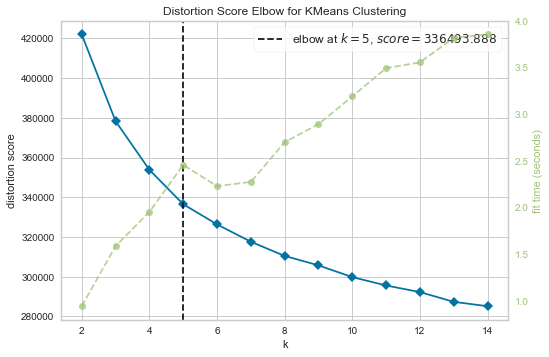

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


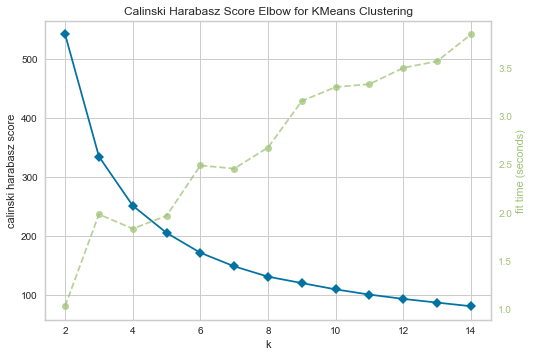

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


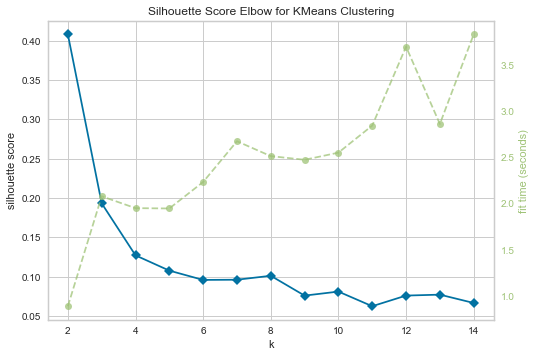

In [92]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

liste_metrics = ['distortion', 'calinski_harabasz', 'silhouette']
#on teste la règle du coude avec trois métriques différentes : 
# distorsion = somme au carré des distances de chaque point à son centroïde
# calinski_harabasz = ratio entre la dispersion entre clusters et la dispersion dans le cluster
# silhouette = moyenne du ratio entre la distance au centroïde de son cluster et la distance au centroïde le plus proche

i=1
for metric in liste_metrics:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,15), metric=metric) 
    visualizer.fit(df_cluster)       
    visualizer.show() 
i=+1

### Clustering à 4 clusters

Dans un premier temps on réalise un clustering à 4 clusters, qui semble le plus pertinent d'après la règle du coude. 

In [108]:
df_cluster4 = df_cluster.copy() #refaire une copie à chaque fois !!!

N_CLUSTERS = 4
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster4)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster4)

df_cluster4['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

df_clusterised4 = df_cluster4
df_clusterised4

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,0,1,0,1,0,1,...,1,1,0,1,0,1,0,0,1,0
PA1012,37.425150,34.131737,65.868263,10.715432,0,1,0,1,0,1,...,0,1,0,0,1,1,0,1,0,2
PA1029,43.636364,51.818182,48.181818,3.529034,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,2
PA1198,32.047478,33.234421,66.765579,10.811678,0,1,0,1,0,1,...,1,1,0,1,0,1,0,1,0,0
PA1206,28.409091,45.454545,54.545455,5.646455,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
PA856,38.770053,42.780749,57.219251,11.998717,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,2
PA923,40.259740,41.991342,58.008658,7.410972,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,2


In [109]:
df_clusterised4 = df_clusterised4.merge(groupe, left_index=True, right_index=True)
df_clusterised4.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)

# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats4 = []
for i in range (N_CLUSTERS):
     list_resultats4.append(df_clusterised4[df_clusterised4['cluster'] == i])

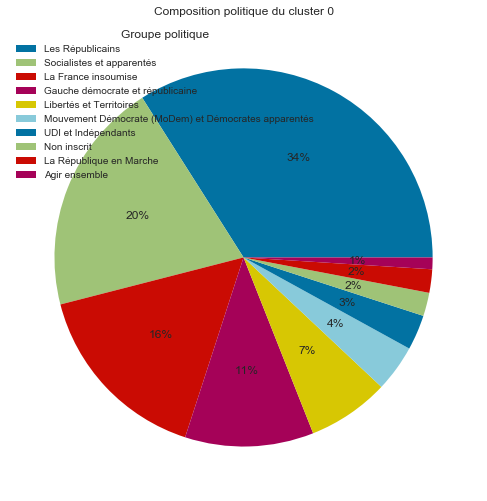

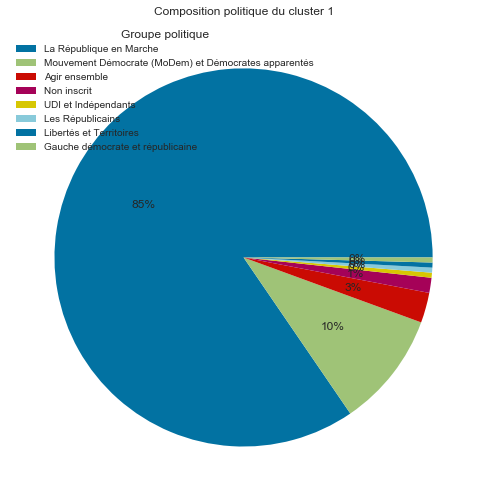

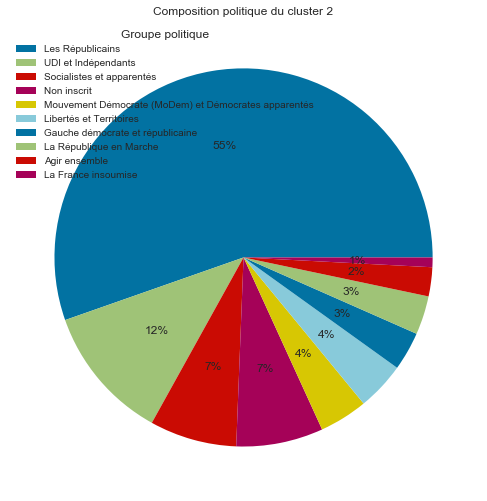

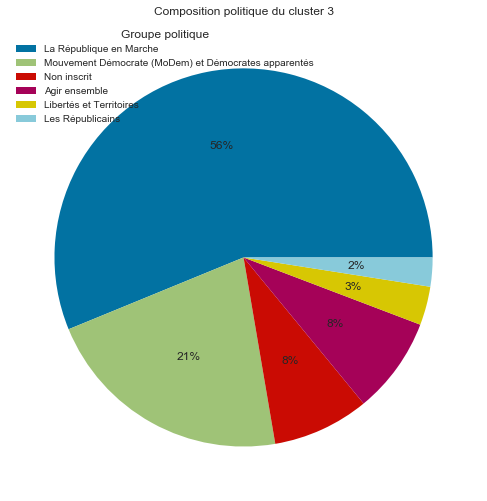

In [110]:
#On représente la composition politique de chaque cluster
i=1
for k in range(N_CLUSTERS):
    plt.figure(1, figsize=(20, 40))
    plt.subplot(4, 1, i)
    ax = plt.pie(list_resultats4[k]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
    plt.title("Composition politique du cluster " + str(k) ) 
    labels = list_resultats4[k]['Groupe'].value_counts().index
    plt.legend(labels=labels, title='Groupe politique', loc='upper left')
    #g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
    plt.show()
    i+=1

### Clustering sur l'historique de votes uniquement

In [141]:
df_historique = df_cluster.copy()
df_historique = df_historique.drop(['indice_accord', 'Contre', 'Pour', 'taux_participation'], axis=1)
df_historique

,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,3_Pour,4_Non-votant,4_Pour,5_Non-votant,...,3112_Non-votant,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
PA1012,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,1,0,1,0
PA1029,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA1198,0,1,0,1,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
PA1206,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA856,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
PA923,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


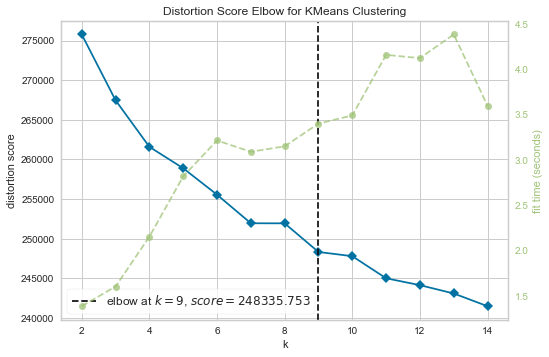

C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\pmong\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


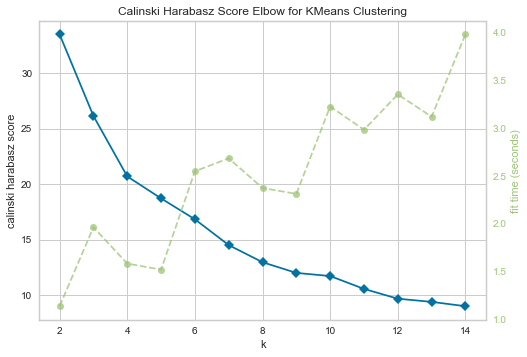

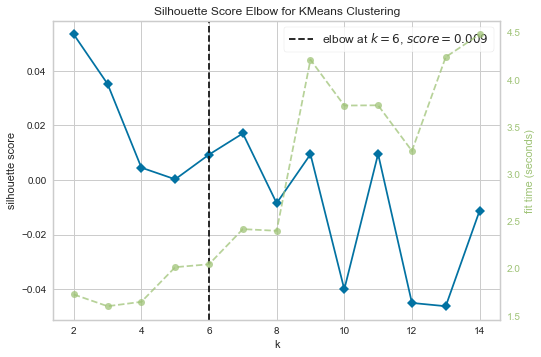

In [113]:
#on regarde la règle du coude avec trois métriques différentes
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

liste_metrics = ['distortion', 'calinski_harabasz', 'silhouette']

i=1
for metric in liste_metrics:
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,15), metric=metric) 
    visualizer.fit(df_historique)       
    visualizer.show() 
i=+1

In [142]:
N_CLUSTERS = 9
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_historique)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_historique)

df_historique['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [143]:
df_historique = df_historique.merge(groupe, left_index=True, right_index=True)
df_historique.rename(columns={'Groupe politique (complet)': 'Groupe'}, inplace=True)

# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_resultats9 = []
for i in range (N_CLUSTERS):
     list_resultats9.append(df_historique[df_historique['cluster'] == i])

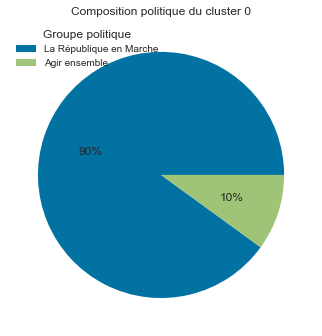

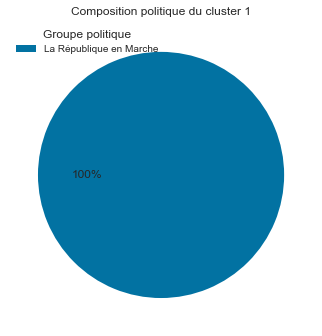

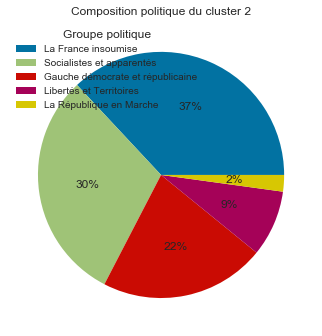

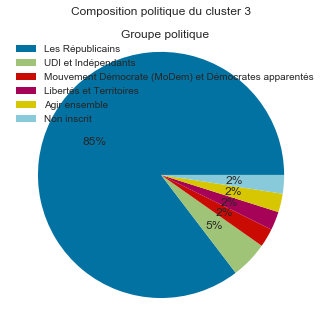

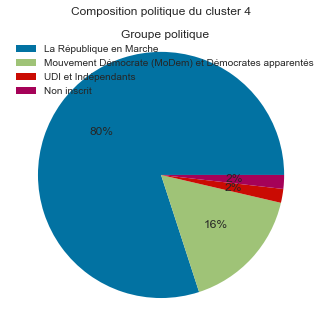

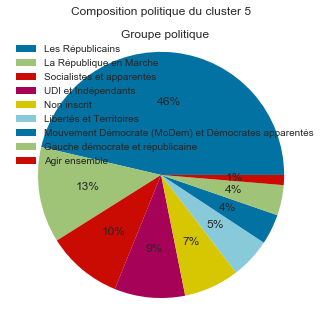

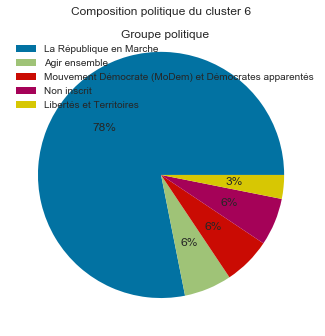

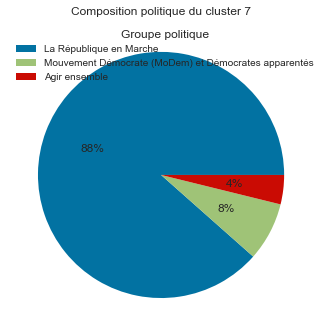

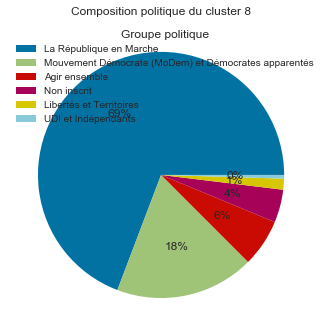

In [148]:
#On représente la composition politique de chaque cluster
i=1
for k in range(N_CLUSTERS):
    plt.figure(1, figsize=(15, 60))
    plt.subplot(N_CLUSTERS, 1, i)
    
        #mettre la liste_resultats correspondant au bon nb de clusters !!! 

    ax = plt.pie(list_resultats9[k]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%', labeldistance=None)
    plt.title("Composition politique du cluster " + str(k) ) 
    
    #idem mettre le bon numéro : 
    labels = list_resultats9[k]['Groupe'].value_counts().index
    
    plt.legend(labels=labels, title='Groupe politique', loc='upper left')
    plt.show()
    i+=1

### PCA sur l'historique de vote uniquement

In [149]:
groupe_to_labels = {groupe : idx for idx, groupe in enumerate(df_historique.Groupe.unique())}
labels_to_groupe = {label : groupe for groupe, label in groupe_to_labels.items()}

labels = [groupe_to_labels[groupe] for groupe in df_historique.Groupe]

df_historique['labels'] = labels

Variance: [0.07678252 0.04533263 0.02207182 0.01972194 0.01859741 0.01576259
 0.01428037 0.01367357 0.01189817 0.01050919 0.01023521 0.00994668
 0.00906365 0.00835237 0.0082829  0.00801247 0.00748319 0.00711221
 0.00676011 0.0065427  0.00640872 0.00636536 0.00612474 0.00567132
 0.00564465 0.00551485 0.005305   0.005232   0.0051882  0.00503889]
Variance totale: 0.38691542020075365


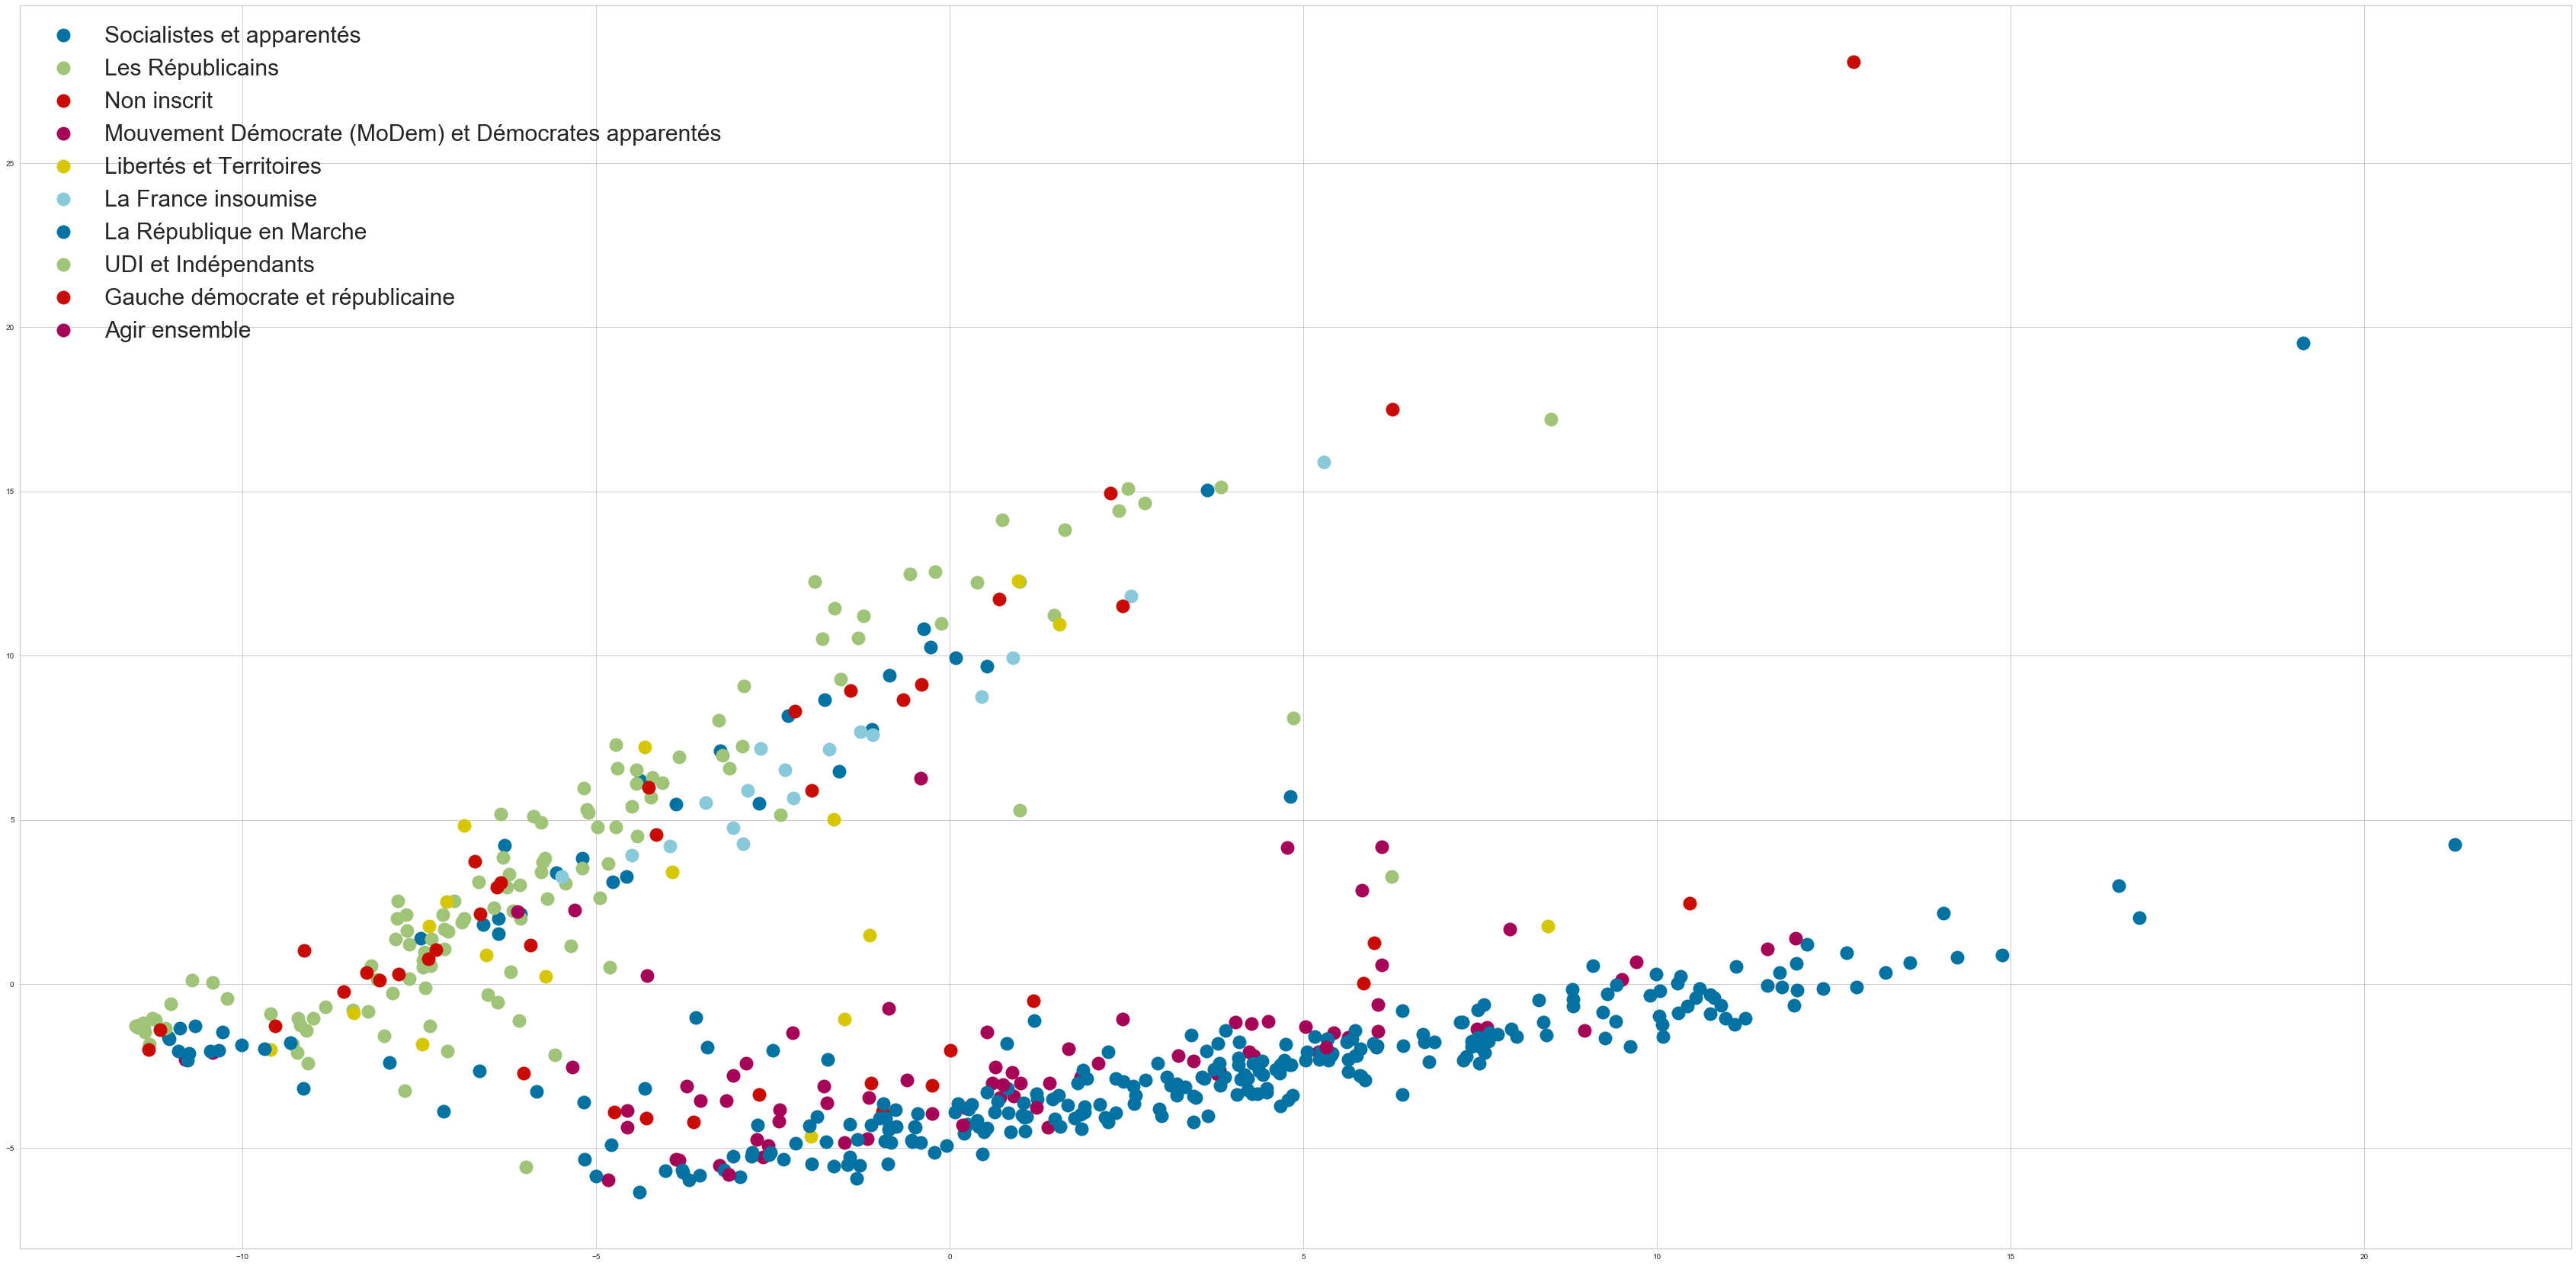

In [152]:
pca = PCA(n_components=30)

pca_resultats = pca.fit_transform(resultats)

print('Variance:',pca.explained_variance_ratio_)
print('Variance totale:',pca.explained_variance_ratio_.sum())


resultats_reduced = pca.transform(resultats)
x = resultats_reduced[:, 0]
y = resultats_reduced[:, 1]

df_plot = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df_plot.groupby('label')
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [60,30]
ax.margins(0.05)
for name, group in groups:
    groupe = labels_to_groupe[name]
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=groupe)
ax.legend(fontsize = 30)

plt.show()

## Autres visualisations

[Text(0, 0, 'La République en Marche')]

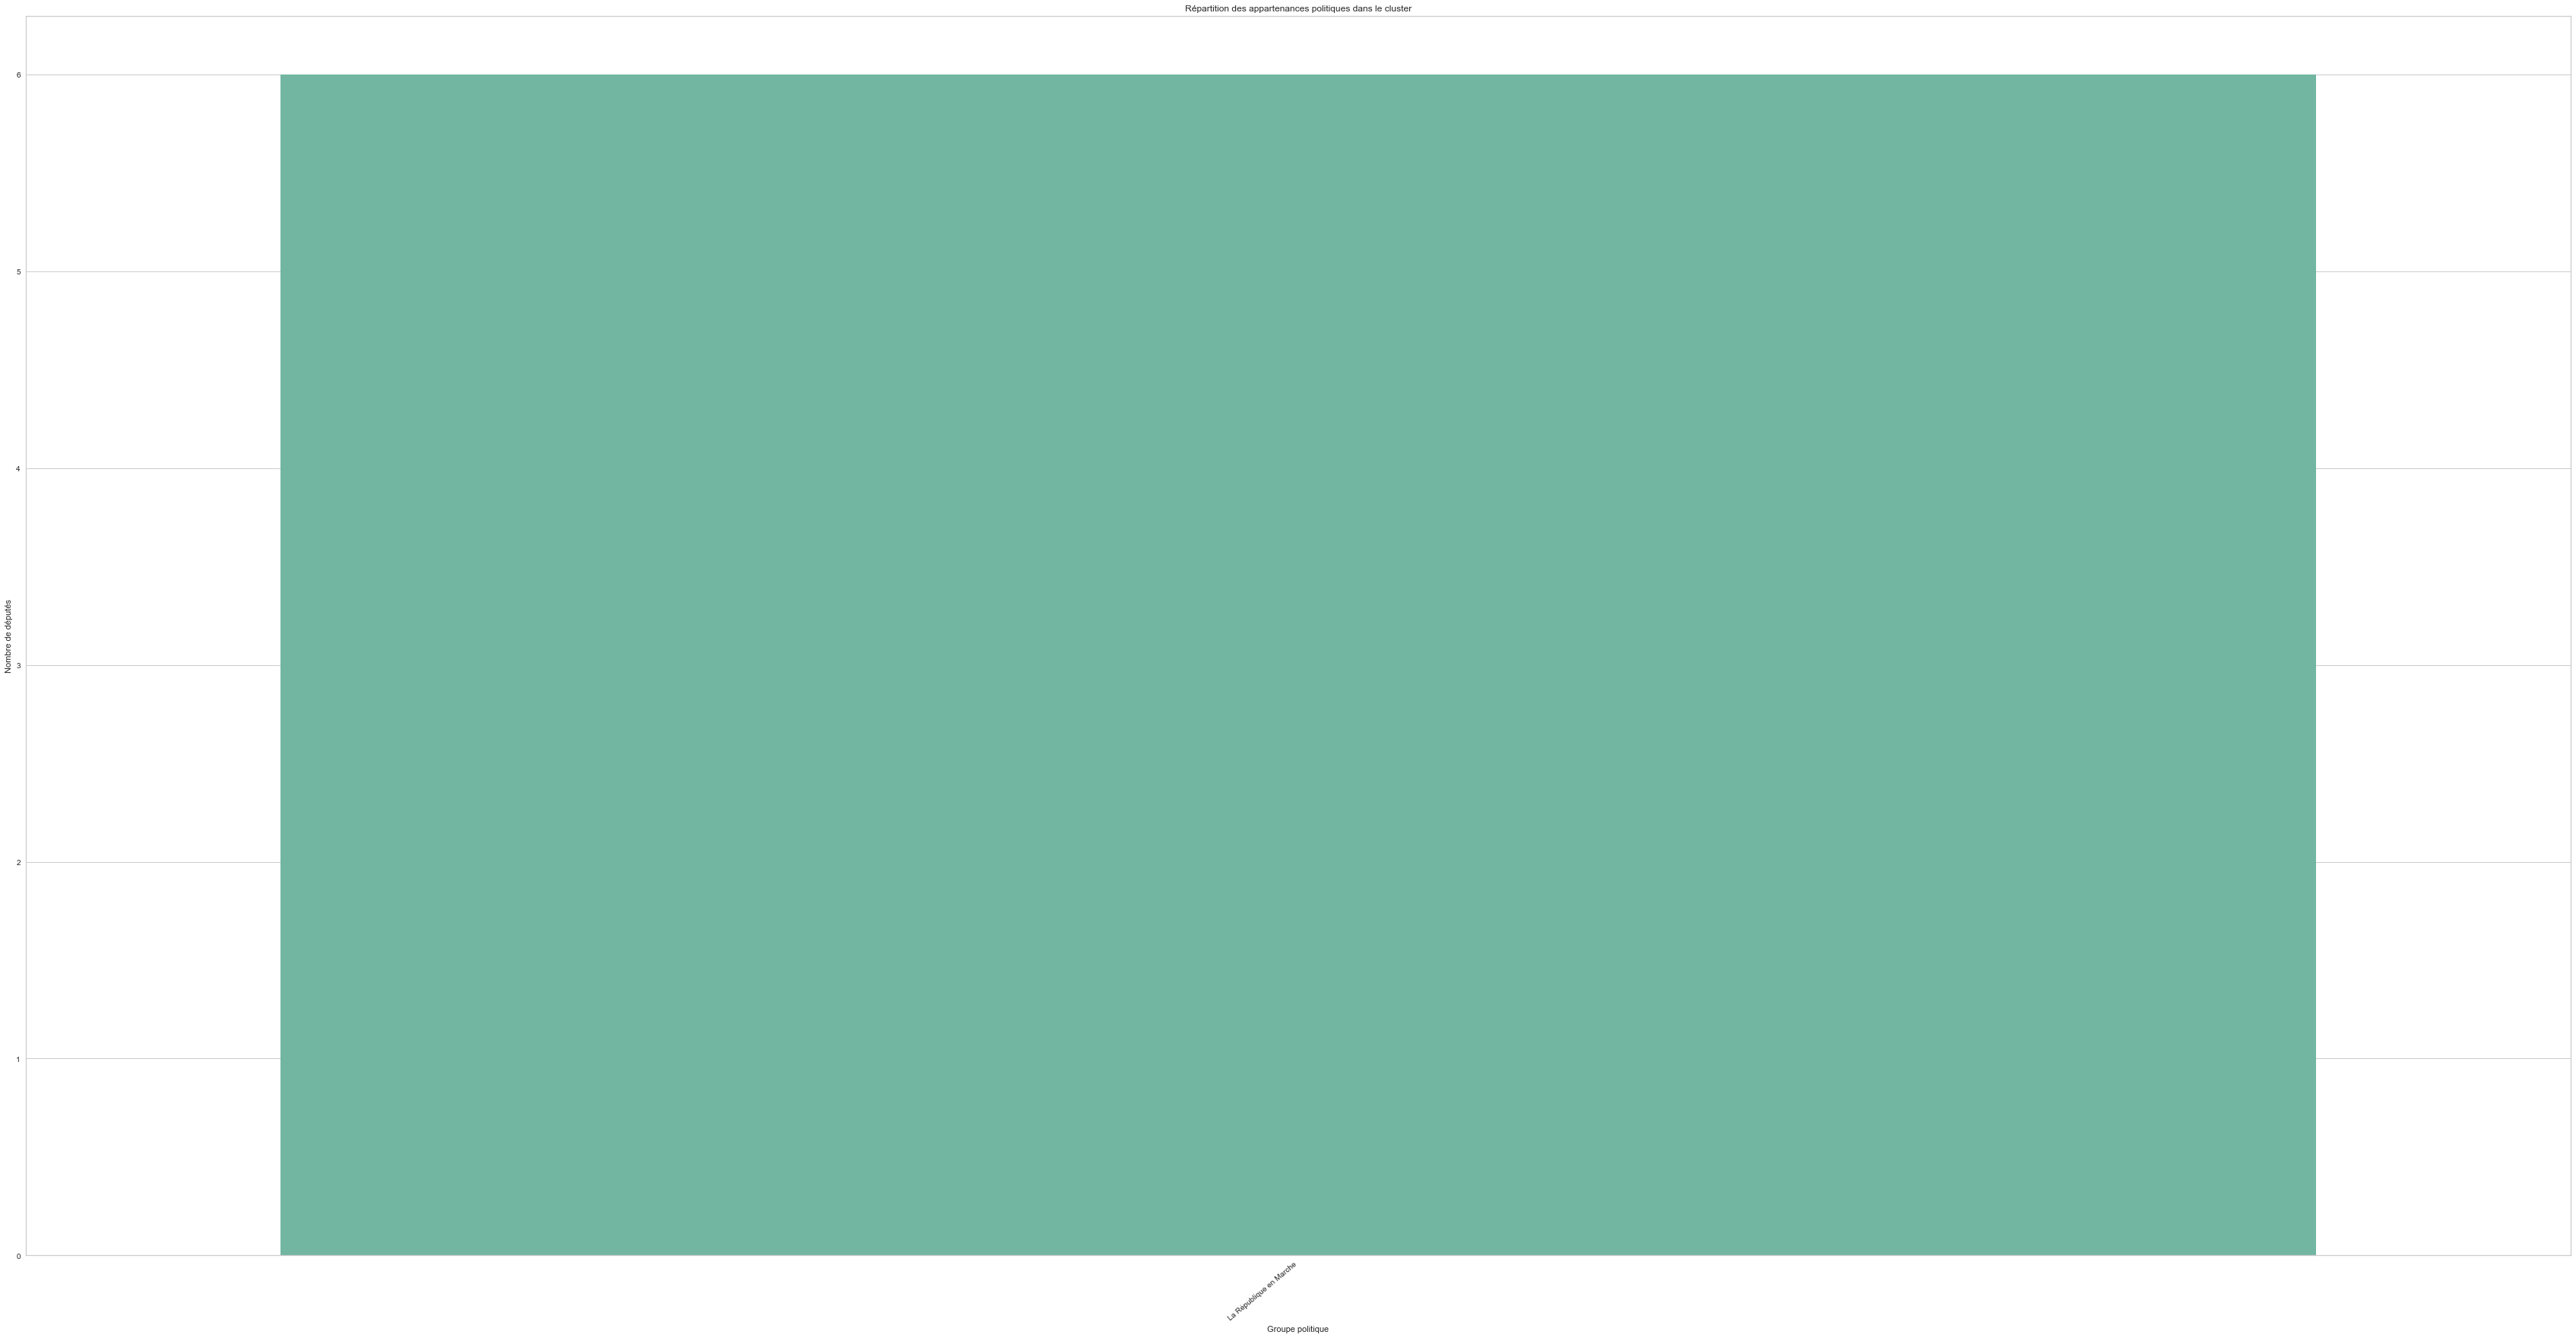

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(data=list_resultats9[1], x='Groupe', palette='Set2')
plt.title('Répartition des appartenances politiques dans le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

[Text(0, 0, 'La République en Marche'),
 Text(1, 0, 'Agir ensemble'),
 Text(2, 0, 'Les Républicains'),
 Text(3, 0, 'Non inscrit'),
 Text(4, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(5, 0, 'Libertés et Territoires'),
 Text(6, 0, 'UDI et Indépendants'),
 Text(7, 0, 'Gauche démocrate et républicaine')]

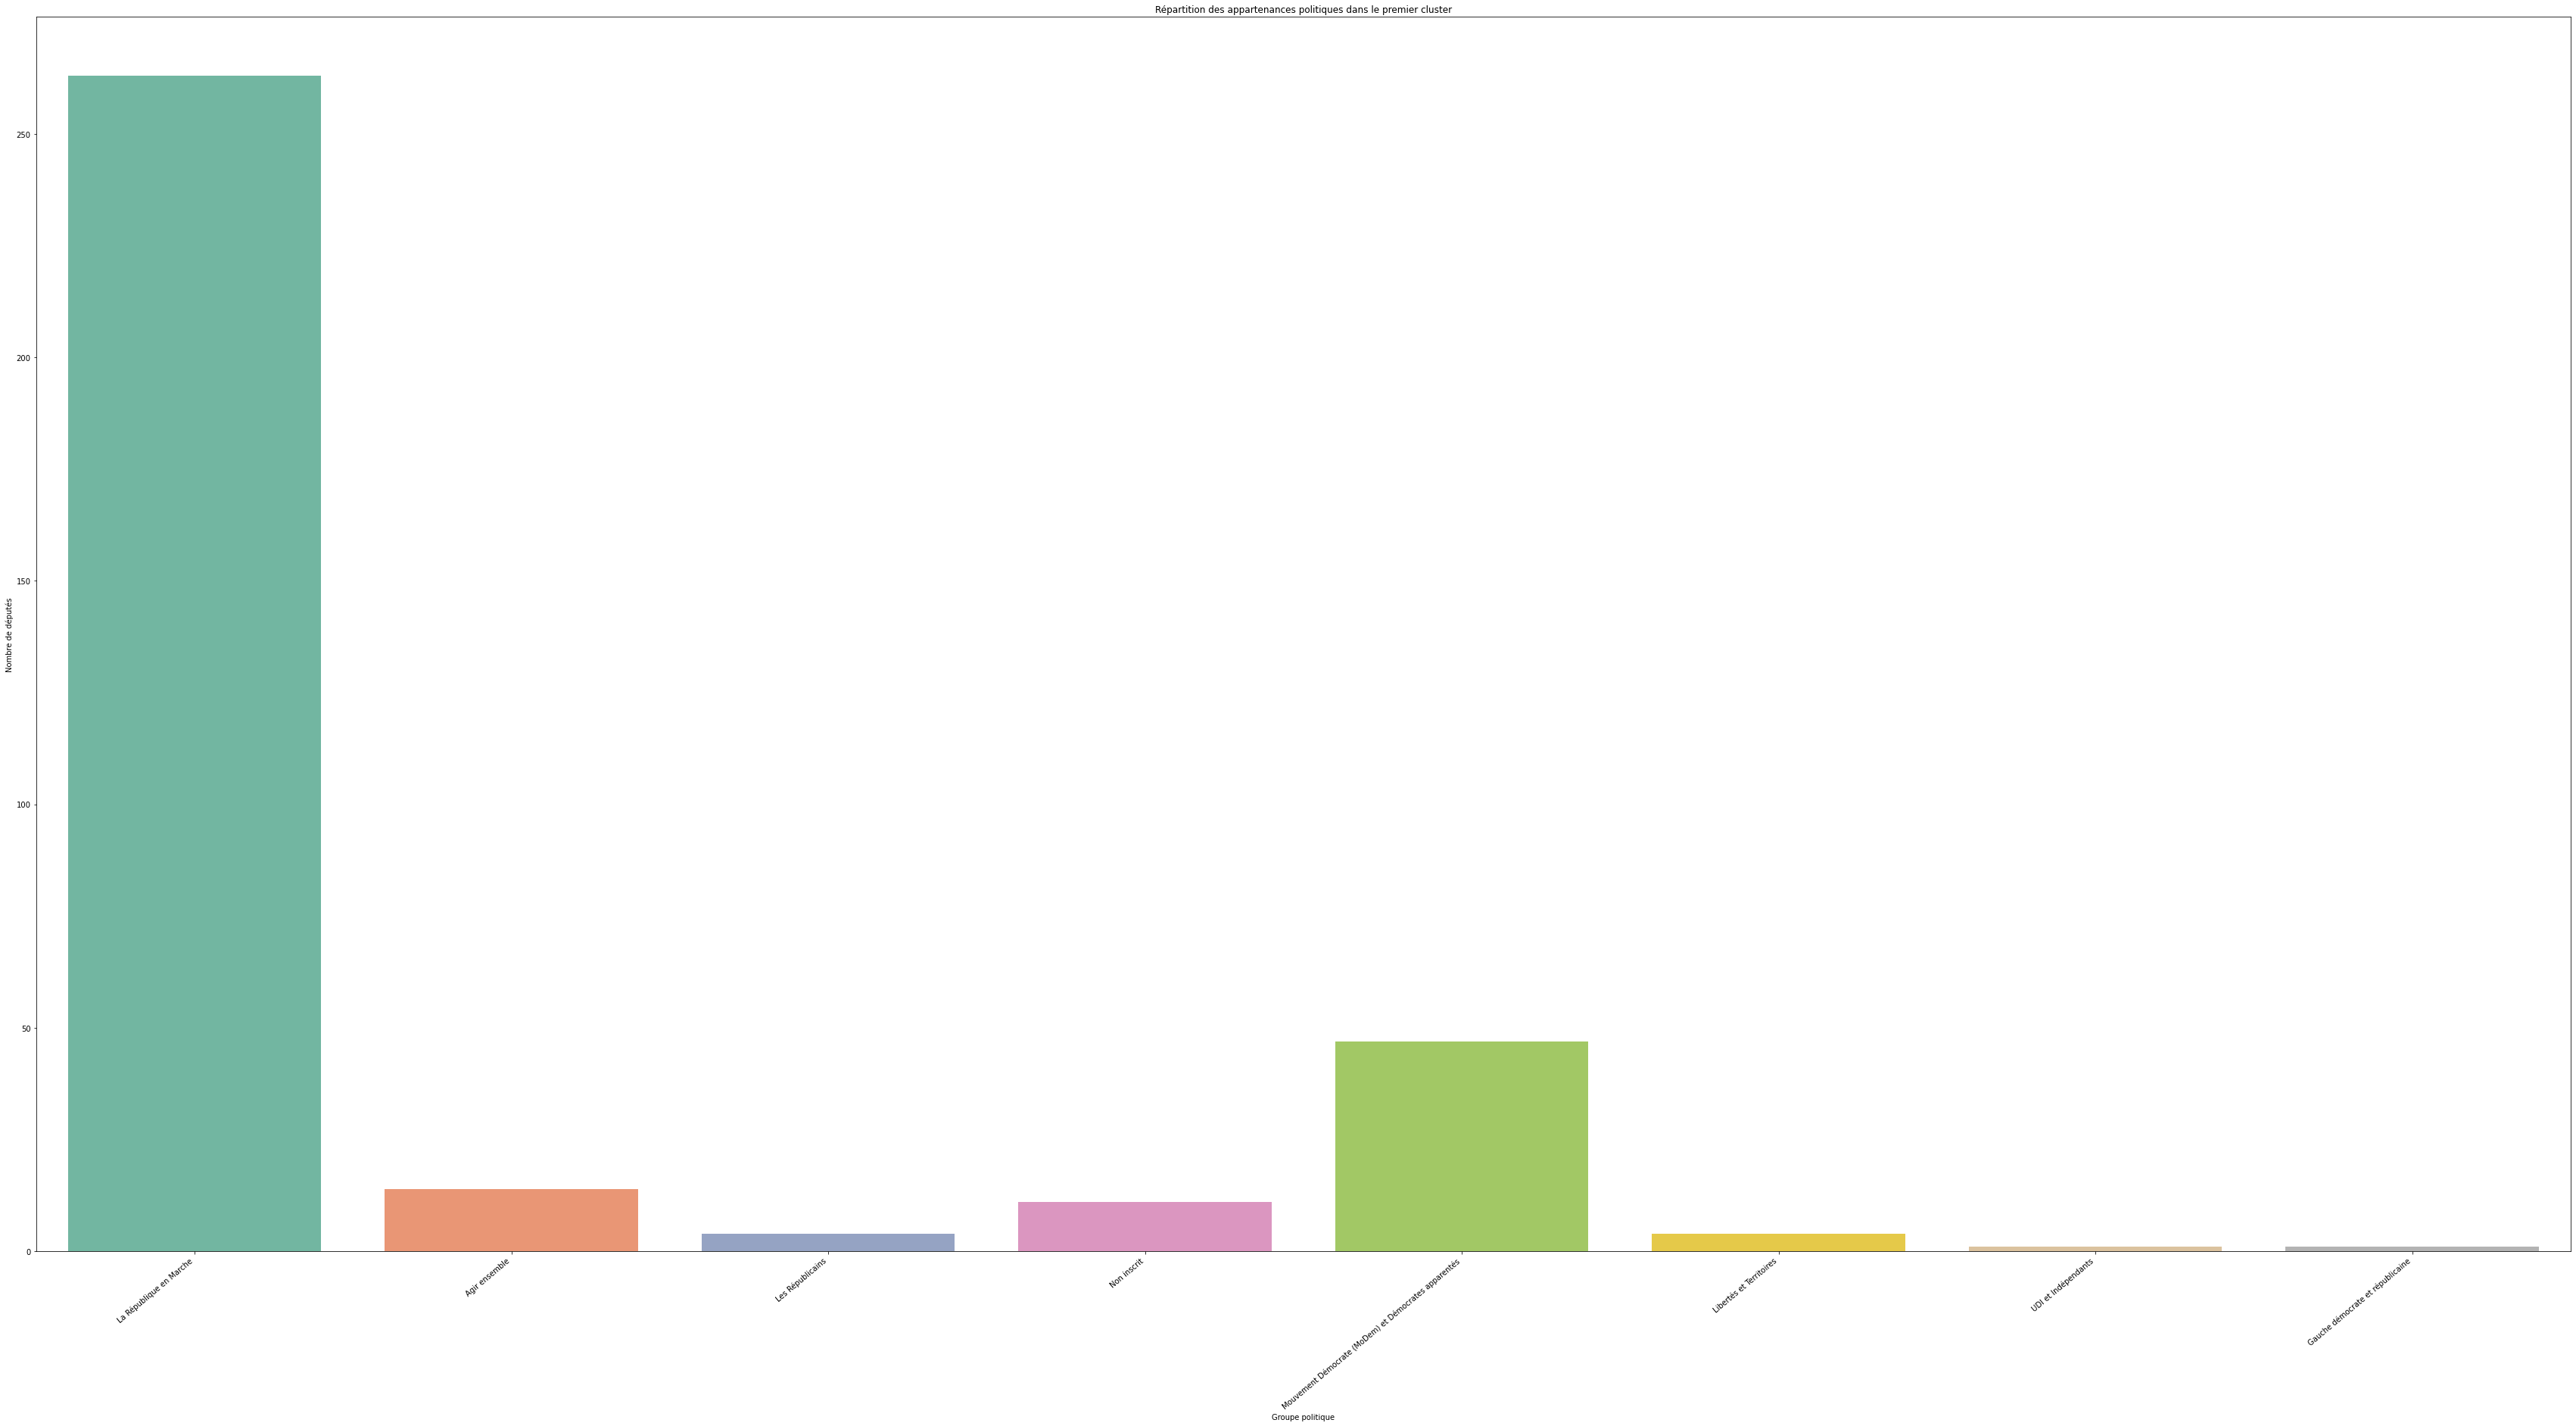

In [118]:
g = sns.countplot(data=list_cluster2[0], x='Groupe', palette='Set2')
plt.title('Répartition des appartenances politiques dans le premier cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

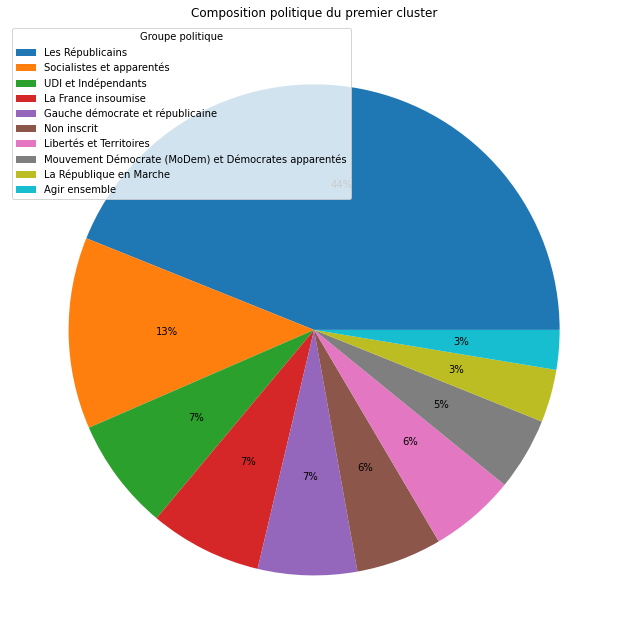

In [119]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster2[1]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster2[1]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

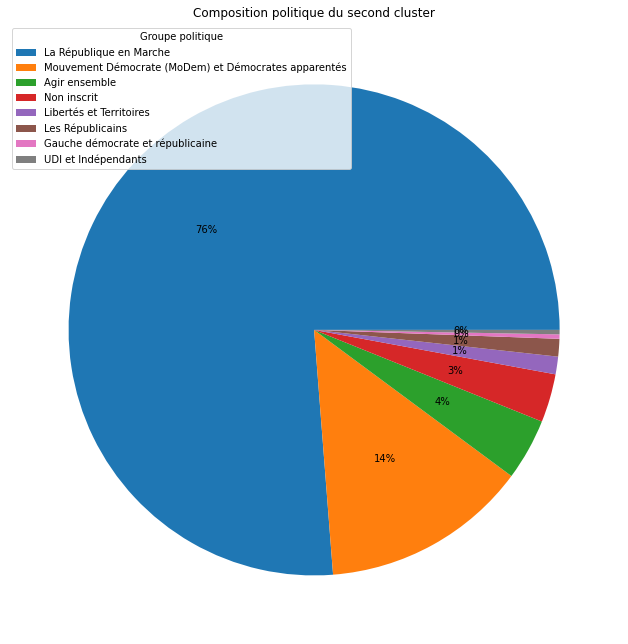

In [120]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster2[0]["Groupe"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du second cluster")
labels = list_cluster2[0]['Groupe'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
plt.show()

[Text(0, 0, 'Socialistes et apparentés'),
 Text(1, 0, 'Les Républicains'),
 Text(2, 0, 'Non inscrit'),
 Text(3, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(4, 0, 'Libertés et Territoires'),
 Text(5, 0, 'La France insoumise'),
 Text(6, 0, 'La République en Marche'),
 Text(7, 0, 'UDI et Indépendants'),
 Text(8, 0, 'Gauche démocrate et républicaine'),
 Text(9, 0, 'Agir ensemble')]

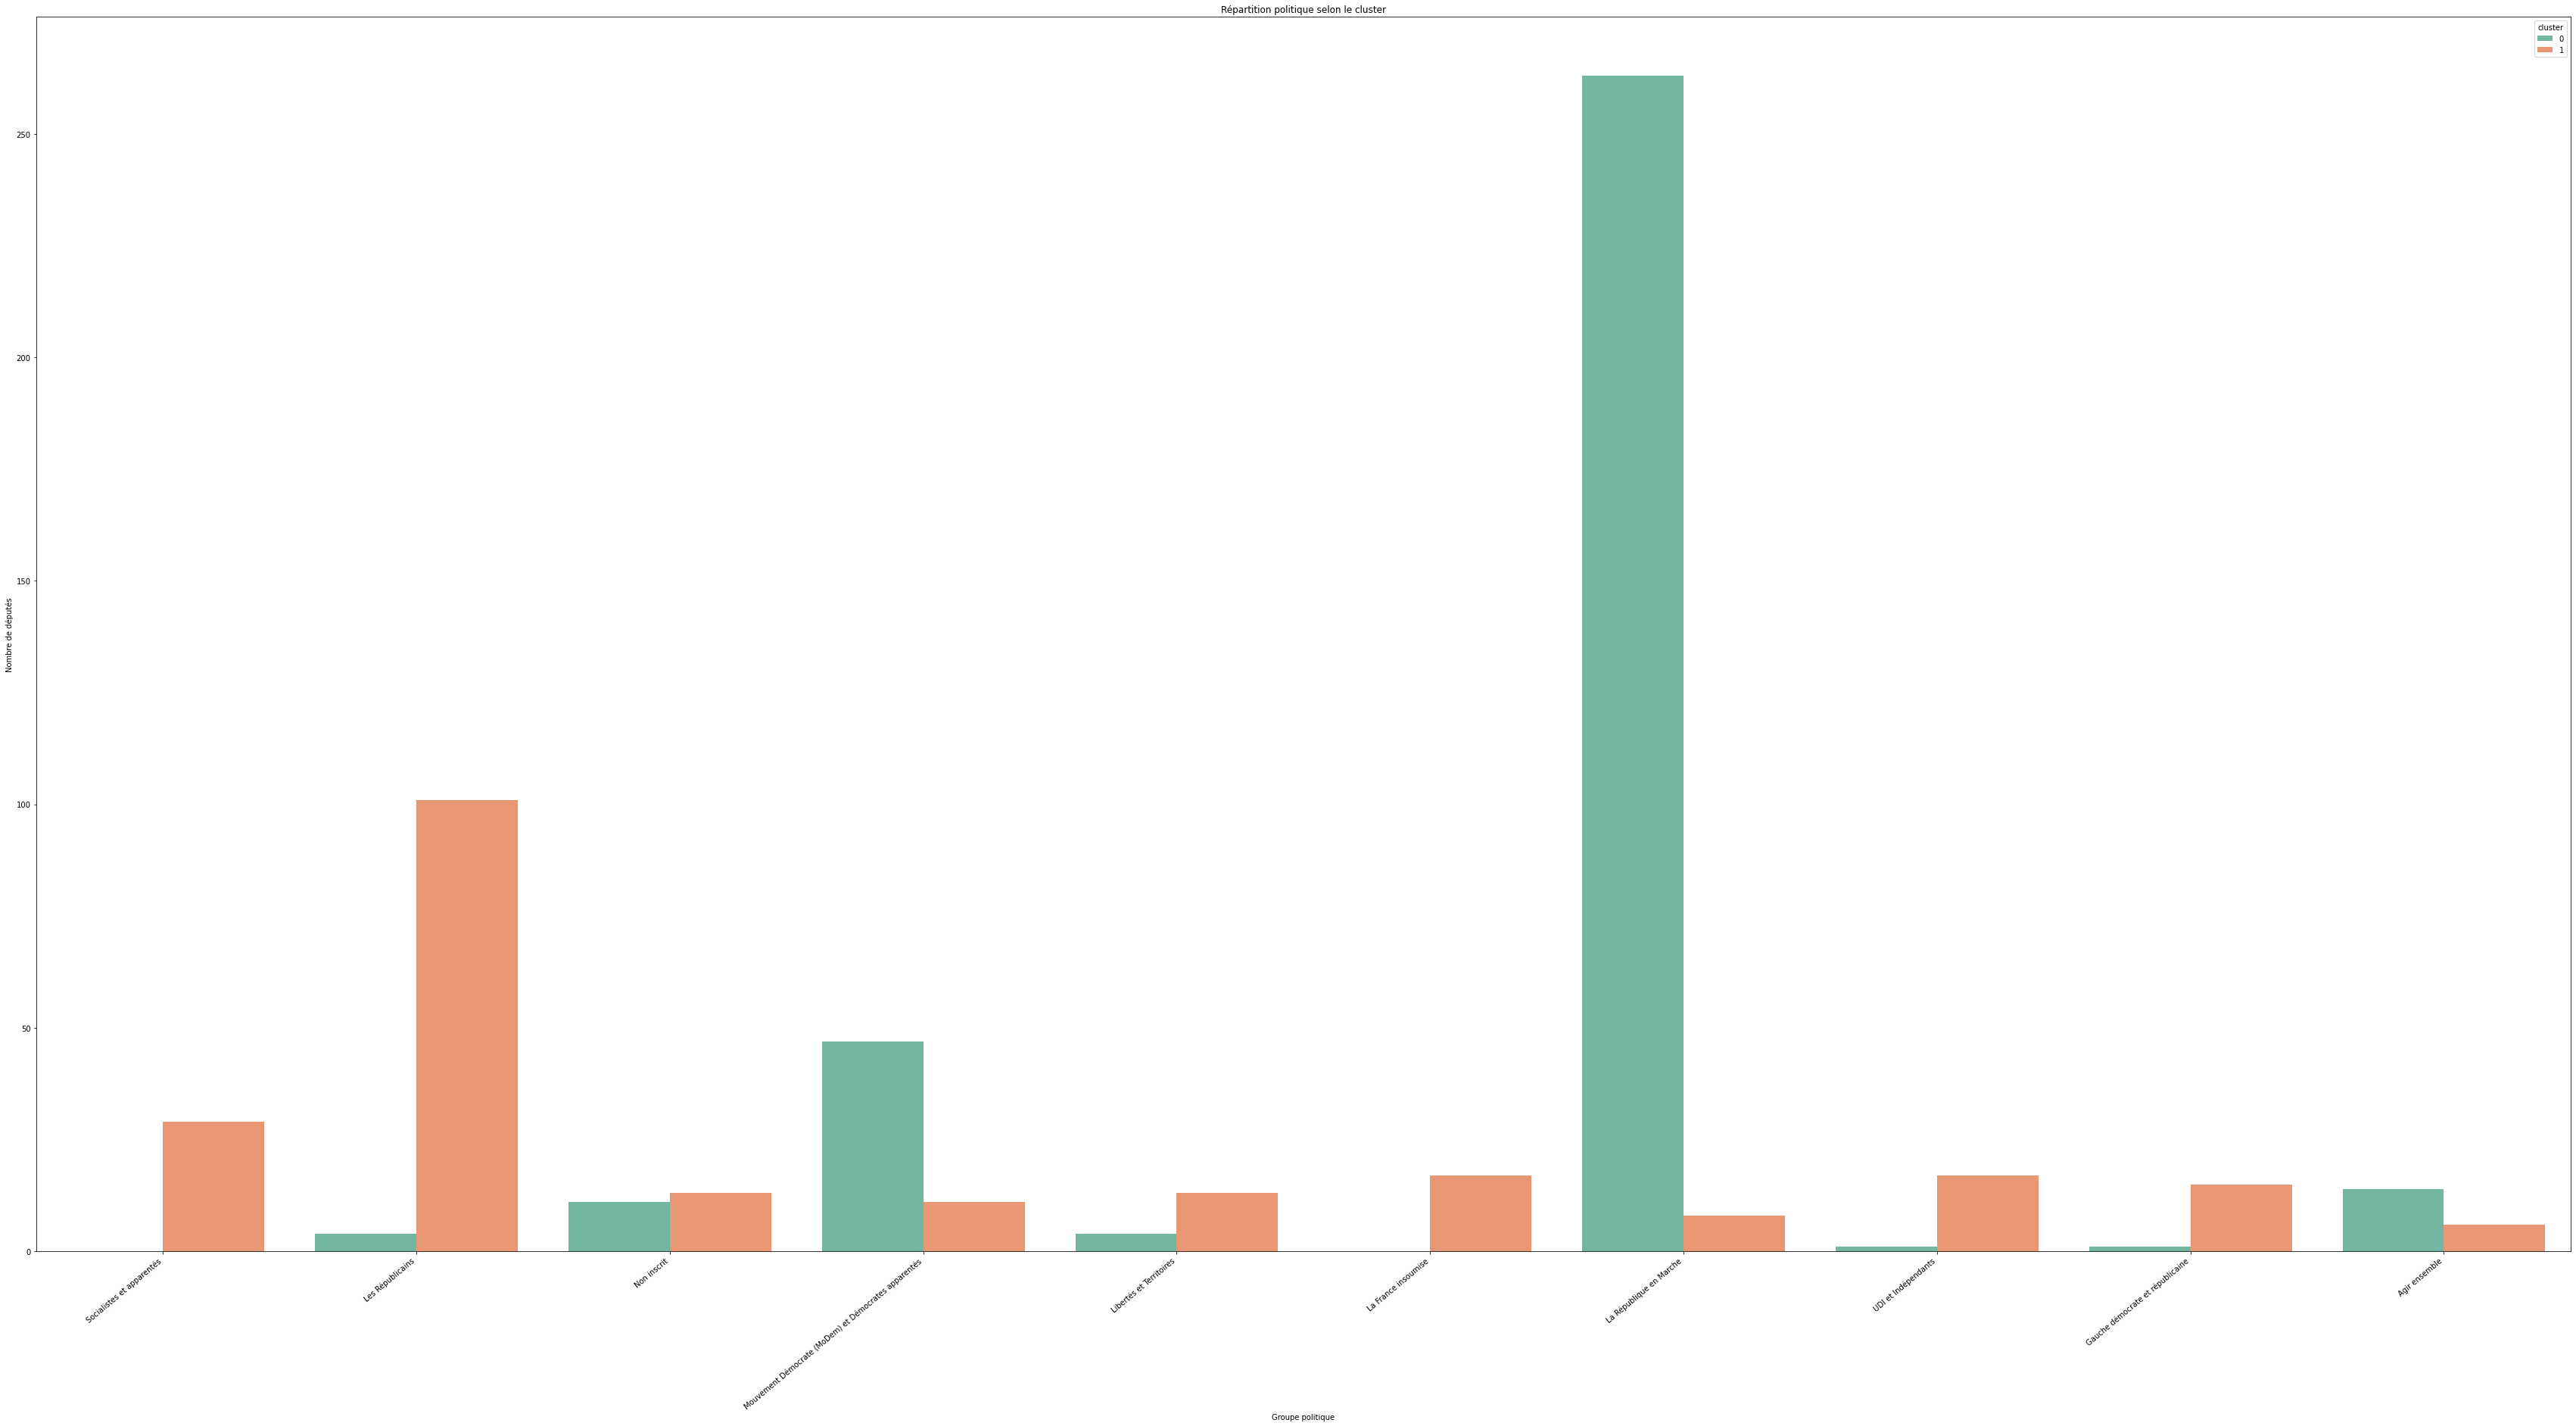

In [122]:
g = sns.countplot(data=df_final2, x='Groupe', palette='Set2', hue='cluster')
plt.title('Répartition politique selon le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')

**Clustering à 3 clusters**

On affine le premier clustering en en faisant un nouveau à 3 clusters. Cela permet de faire émerger 3 groupes : 1) la majorité 'pure', 2) la majorité et sa coalition de droite, 3) l'opposition. 

In [123]:
df_cluster3 = df_cluster

N_CLUSTERS = 3
clustering = KMeans(n_clusters=N_CLUSTERS)
clustering.fit(df_cluster3)

#on détermine ensuite dans quel cluster chaque individu de df_cluster sera affecté :
pred = clustering.predict(df_cluster3)

df_cluster3['cluster'] = pred #on ajoute une colonne au df, qui indique le numéro du cluster auquel appartient chaque individu

In [124]:
df_clusterised3 = df_cluster3
df_clusterised3

,indice_accord,Contre,Pour,taux_participation,0_Pour,1_Non-votant,1_Pour,2_Non-votant,2_Pour,3_Non-votant,...,3112_Pour,3113_Non-votant,3113_Pour,3114_Non-votant,3114_Pour,3115_Non-votant,3115_Pour,3116_Non-votant,3116_Pour,cluster
idVotant,,,,,,,,,,,,,,,,,,,,,
PA1008,31.937984,31.162791,68.837209,20.692974,0,1,0,1,0,1,...,1,1,0,1,0,1,0,0,1,1
PA1012,37.425150,34.131737,65.868263,10.715432,0,1,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
PA1029,43.636364,51.818182,48.181818,3.529034,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,2
PA1198,32.047478,33.234421,66.765579,10.811678,0,1,0,1,0,1,...,1,1,0,1,0,1,0,1,0,1
PA1206,28.409091,45.454545,54.545455,5.646455,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA774962,40.000000,80.000000,20.000000,0.160411,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
PA856,38.770053,42.780749,57.219251,11.998717,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1
PA923,40.259740,41.991342,58.008658,7.410972,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [126]:
#df_final3 = df_clusterised3.merge(groupe, left_index=True, right_index=True)
#df_final3

In [127]:
# On crée un dataframe par cluster, afin de regarder la distribution de la variable d'intérêt dans chaque cluster
list_cluster = []
for i in range (N_CLUSTERS):
     list_cluster.append(df_final3[df_final3['cluster'] == i])

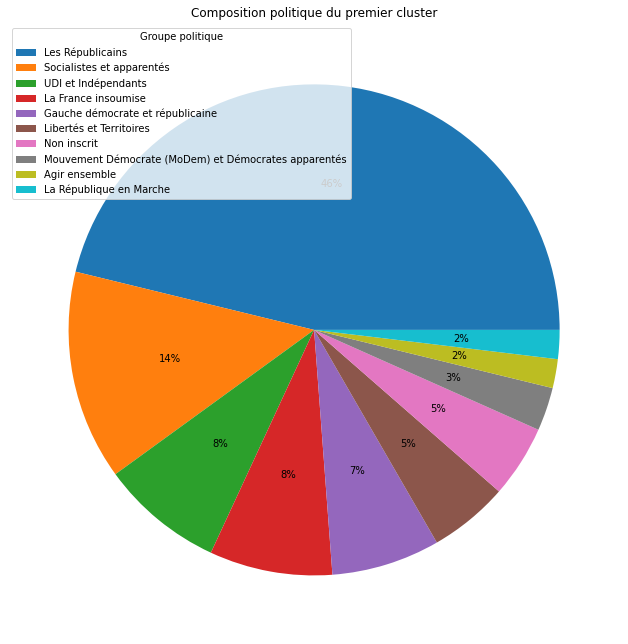

In [130]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[0]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du premier cluster")
labels = list_cluster[0]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

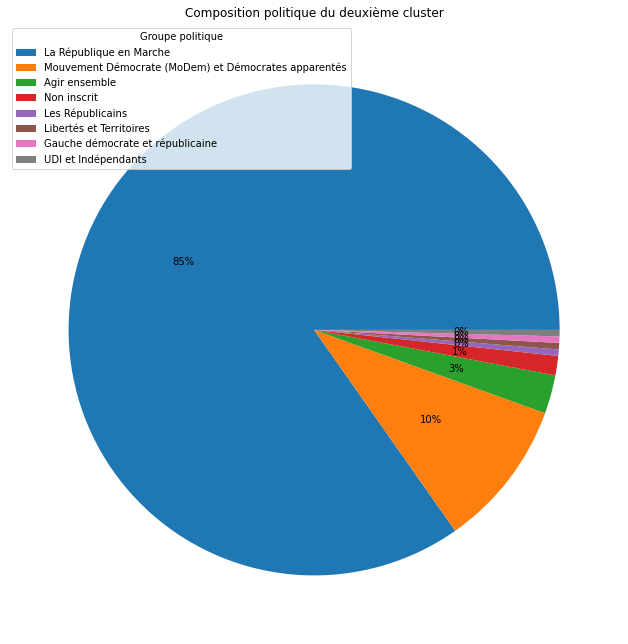

In [131]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[1]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du deuxième cluster")
labels = list_cluster[1]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

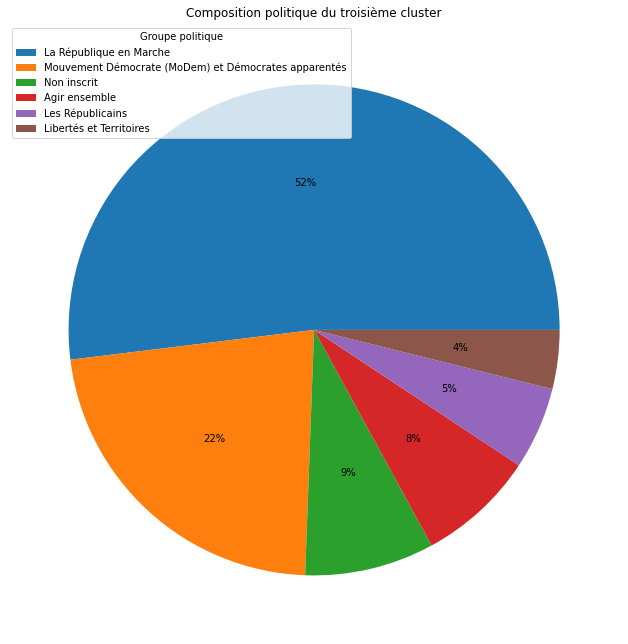

In [82]:
plt.figure(1, figsize=(11, 13))

g = plt.pie(list_cluster[2]["Groupe politique (complet)"].value_counts(normalize=True), autopct='%1.0f%%',
            labeldistance=None)
plt.title("Composition politique du troisième cluster")
labels = list_cluster[2]['Groupe politique (complet)'].value_counts().index
plt.legend(labels=labels, title='Groupe politique', loc='upper left')
#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')
plt.show()

[Text(0, 0, 'Socialistes et apparentés'),
 Text(1, 0, 'Les Républicains'),
 Text(2, 0, 'Non inscrit'),
 Text(3, 0, 'Mouvement Démocrate (MoDem) et Démocrates apparentés'),
 Text(4, 0, 'Libertés et Territoires'),
 Text(5, 0, 'La France insoumise'),
 Text(6, 0, 'La République en Marche'),
 Text(7, 0, 'UDI et Indépendants'),
 Text(8, 0, 'Gauche démocrate et républicaine'),
 Text(9, 0, 'Agir ensemble')]

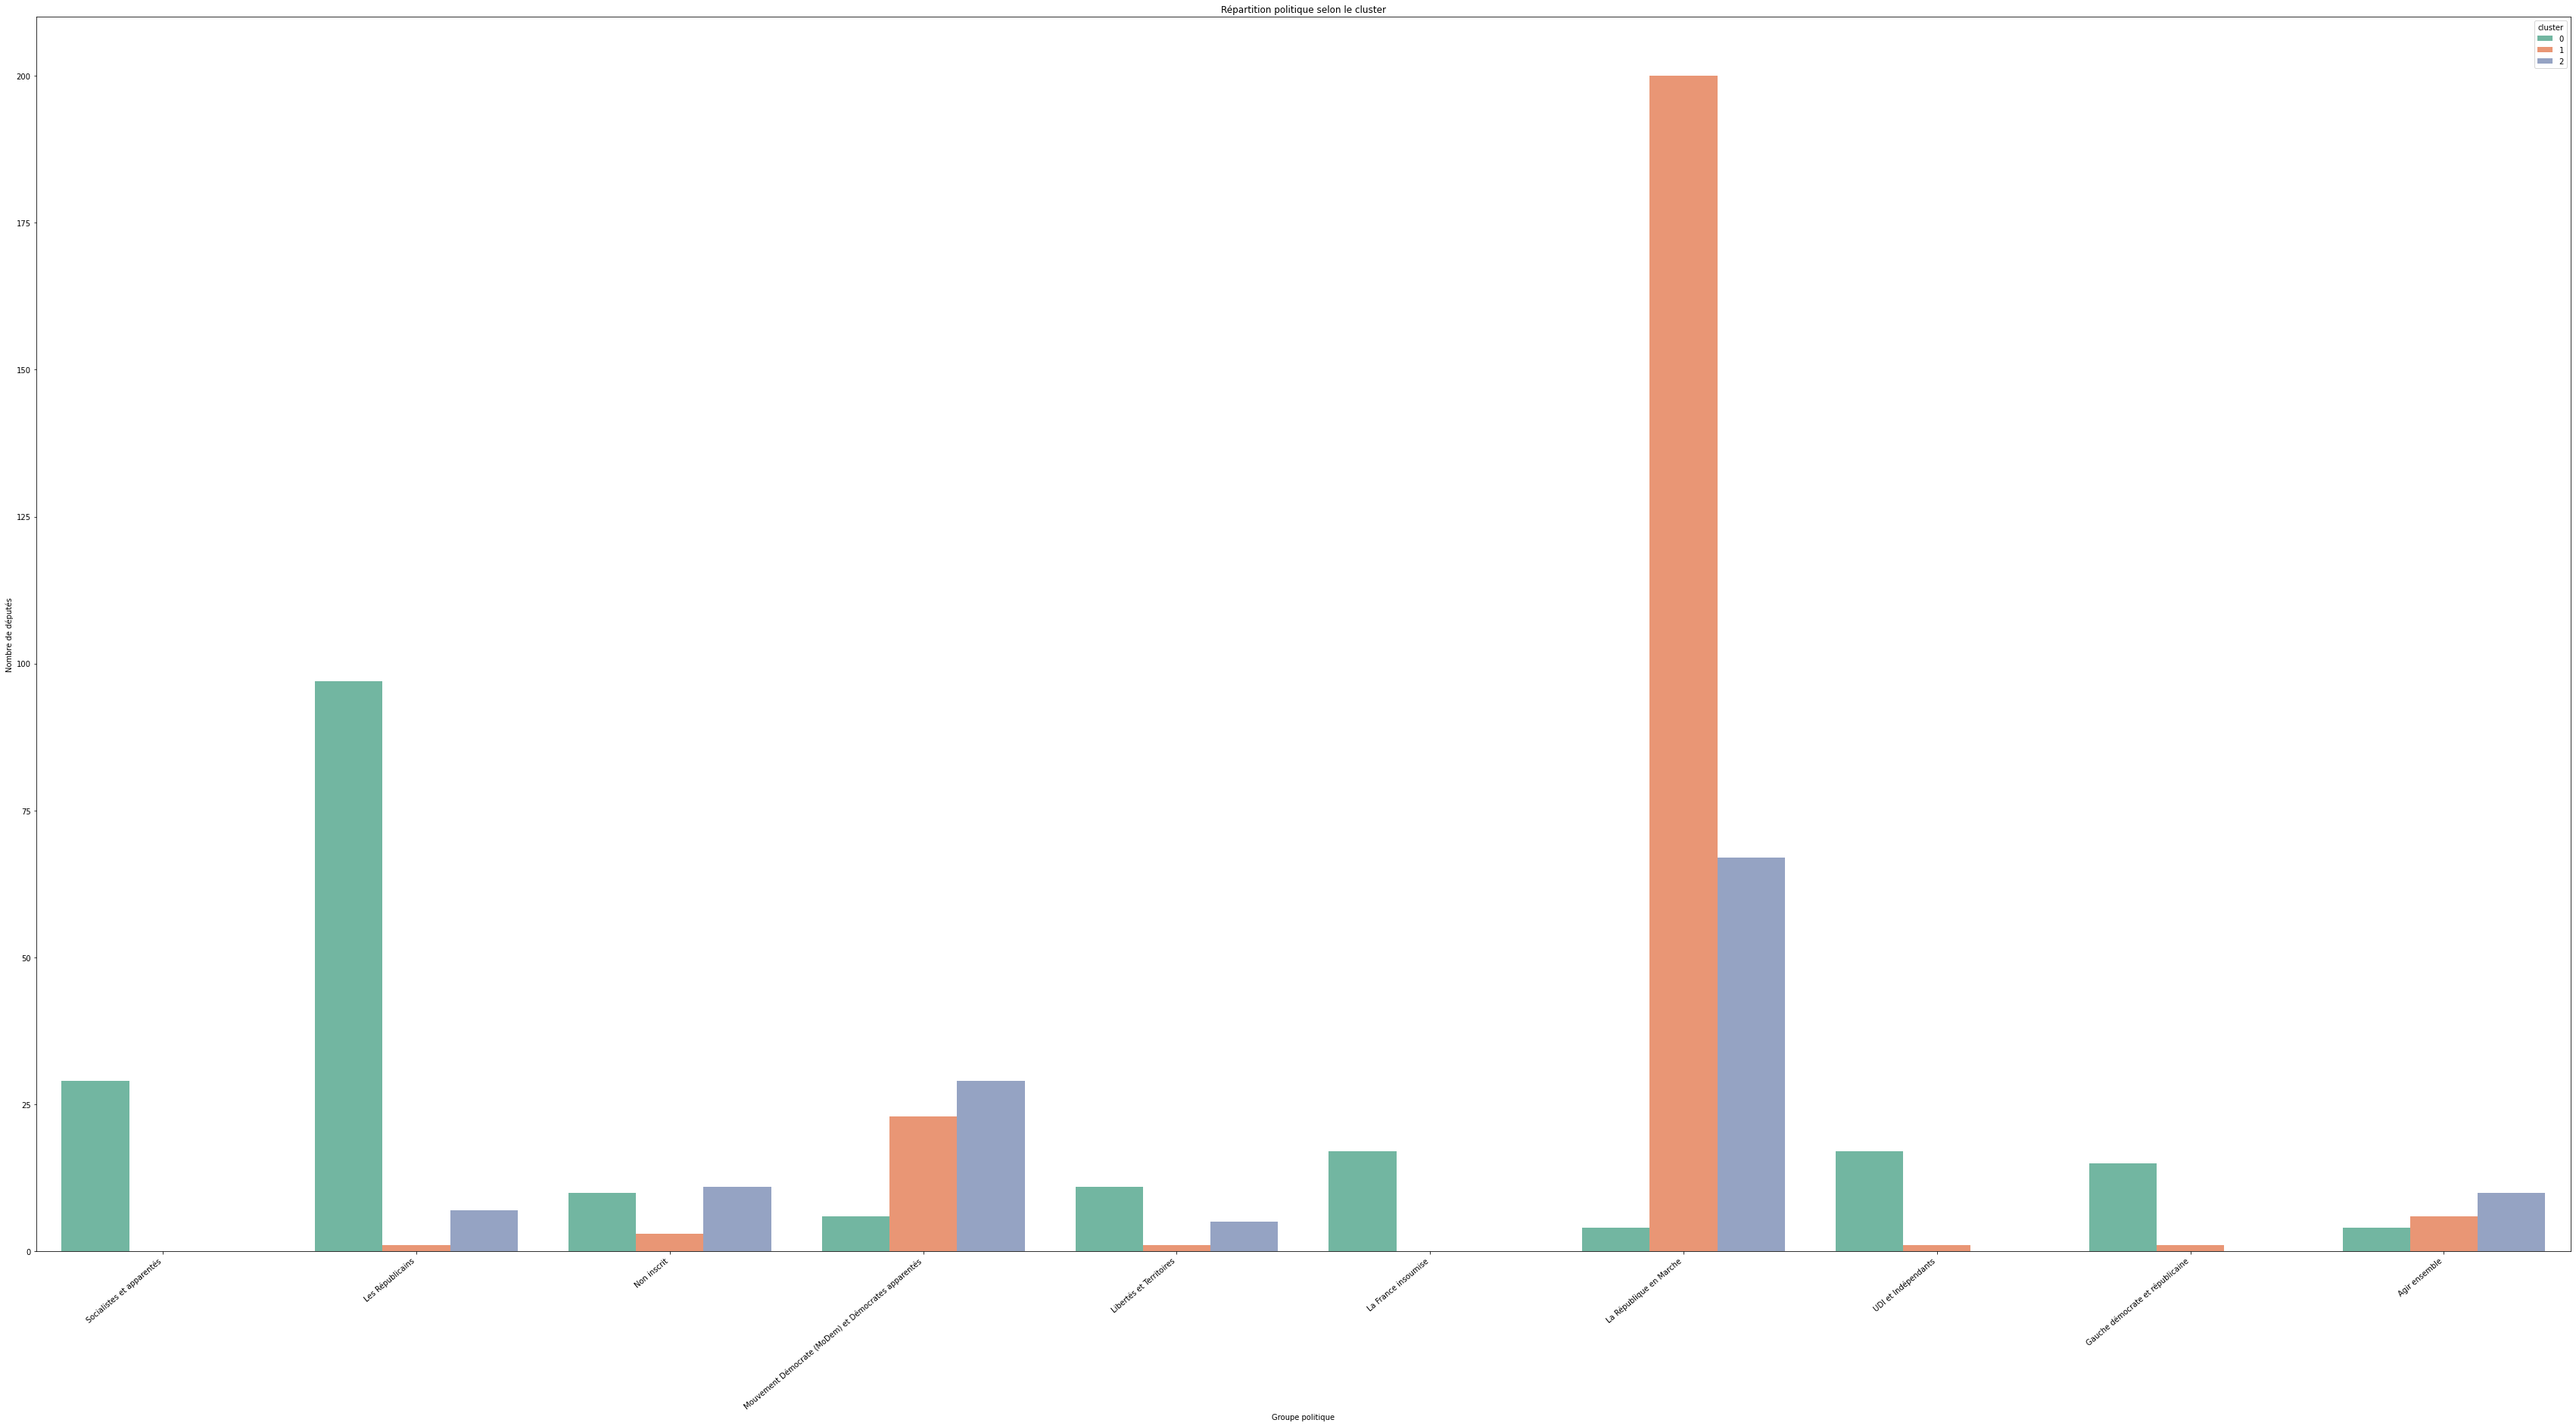

In [132]:
g = sns.countplot(data=df_final3, x='Groupe politique (complet)', palette='Set2', hue='cluster')
plt.title('Répartition politique selon le cluster')
plt.ylabel('Nombre de députés')
plt.xlabel('Groupe politique')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha='right')